In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [12]:
# Generating the sample data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01',end='2024-12-31')
data = np.random.randn(len(dates))
data = np.cumsum(data)  # Cumulative sum to make random data
df = pd.DataFrame(data,index=dates, columns=['Value'])

In [13]:
#Split the data into train and test datasets
train_size=int(len(df)*0.8) #80% data for training
train,test=df[:train_size],df[train_size:]
#Check Stationarity
def check_stationarity(timeseries):
  #perform adfuller
  result=adfuller(timeseries)
  print('ADF Statistics:',result[0])
  print('p-value',result)
  print('Critical Value:')
  for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))


ADF Statistics: -1.5942103292193863
p-value (-1.5942103292193863, 0.486501197421422, 0, 291, {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}, 779.8973809544907)
Critical Value:
	1%:-3.453
	5%:-2.872
	10%:-2.572
ADF Statistics: -17.306885527845132
p-value (-17.306885527845132, 5.584898848051816e-30, 0, 290, {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}, 779.0688201668539)
Critical Value:
	1%:-3.453
	5%:-2.872
	10%:-2.572


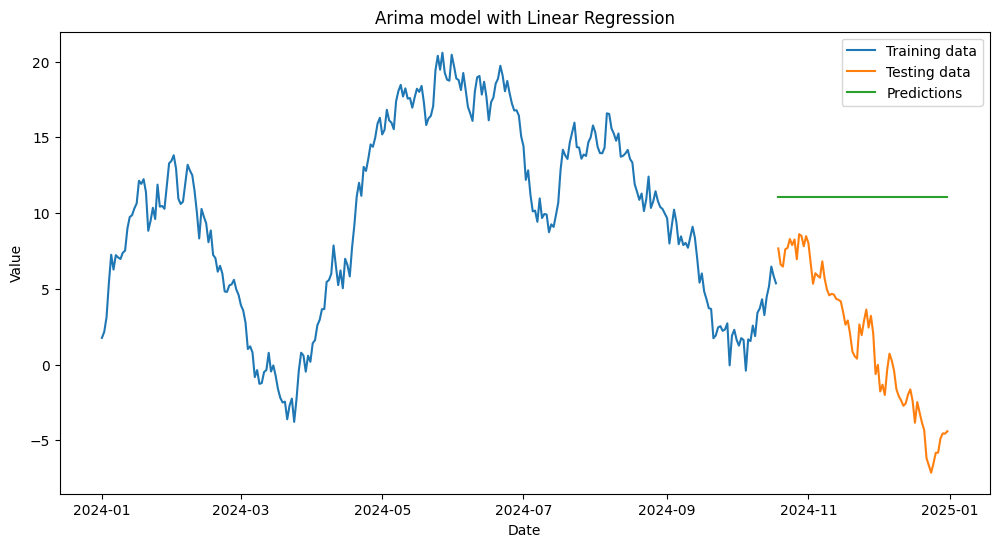

In [15]:
check_stationarity(train['Value'])

# if data is not stationary, then first take the diiference
train_diff=train.diff().dropna()
check_stationarity(train_diff['Value'])
#Fit a linear regreesion model based on train and test data set
X_train=np.arange(len(train)).reshape(-1,1)
y_train=train['Value'] #one response variable
regressor=LinearRegression()
regressor.fit(X_train,y_train)
trend=regressor.predict(X_train)
#Fit Arima model on residuals
model=ARIMA(train_diff, order=(5,1,0)) #ARIMA  p=5,d=1,q=0
fitted_model=model.fit()
#Predict using the fitted arima model
predictions_diff=fitted_model.forecast(steps=len(test))[0]
predictions_diff=pd.Series(predictions_diff, index=test.index)
#Add trend for obtaining the final predictions
predictions=predictions_diff + trend[-1]
#Plotting the graph
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Value'],label='Training data')
plt.plot(test.index, test['Value'],label='Testing data')
plt.plot(predictions.index,predictions,label='Predictions')
plt.title('Arima model with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()